### <center> Data Visualization with R </center>

#### Grammar of Graphics with **`ggplot2`**

* In this section we will be discussing the **`ggplot2`** library, as well as the philosophy of the grammar of graphics to build beautifull data visualizations. 
* **`ggplot2`** is the most populat data visualization package for R. 
* Created by Hadley Wickham, who also made packages like **`dplyr`** and **`tidyr`**.
* Follows a distinct "Grammar of Graphics" philosophy, which builts on the idea of adding layers on the visualization. 
* Let's see how the layers work!

* **`ggplot`** layers: 
* The first three layers are essential to create a plot. 

|Layer | Description | Essential| Example |
| ---- | ---- | :----:| ---- |
|**Data** | Pass the data frame that you are working with | Y |`ggplot(x=mpg, y=hp)`|
|**Aesthetics** | Specify which columns you want to plot | Y |`ggplot(x=mpg, y=hp)` |
|**Geometries** | The type of graph/mark you want to make | Y |`+ geom_point`|
|**Facets** | Allow us to put multiple graphs in a single canvas | N | `+ facet_grid(cyl~.)`|
|**Statistics** | Add statistical elements like a line fit through the data | N |`+ stat_smooth()`|
|**Coordinates** | Control the axes of the graph | N |`+ coord_cartesian(xlim=c(15,25)`|
|**Theme** | Allow us to apply a theme to the plot (fonts, colors, gridlines, etc.)| N |`+ theme_bw()` |

* A handy ggplot2 cheat sheet from RStudio can be found **[here](https://www.rstudio.com/resources/cheatsheets/)**.

In [7]:
install.packages("ggplot2")


  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE



installing the source package 'ggplot2'



In [6]:
install.packages("ggplot2movies")

package 'ggplot2movies' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\foufo\AppData\Local\Temp\RtmpCwwpNE\downloaded_packages


* Import libraries we want

In [8]:
library(ggplot2)
library(ggplot2movies)

In [11]:
head(movies)

title,year,length,budget,rating,votes,r1,r2,r3,r4,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
$,1971,121,NA,6.4,348,4.5,4.5,4.5,4.5,...,4.5,4.5,,0,0,1,1,0,0,0
$1000 a Touchdown,1939,71,NA,6.0,20,0.0,14.5,4.5,24.5,...,4.5,14.5,,0,0,1,0,0,0,0
$21 a Day Once a Month,1941,7,NA,8.2,5,0.0,0.0,0.0,0.0,...,24.5,24.5,,0,1,0,0,0,0,1
"$40,000",1996,70,NA,8.2,6,14.5,0.0,0.0,0.0,...,34.5,45.5,,0,0,1,0,0,0,0
"$50,000 Climax Show, The",1975,71,NA,3.4,17,24.5,4.5,0.0,14.5,...,0.0,24.5,,0,0,0,0,0,0,0
$pent,2000,91,NA,4.3,45,4.5,4.5,4.5,14.5,...,14.5,14.5,,0,0,0,1,0,0,0


### Histograms

* This is the minimum elements needed to create a histogram. 
* You will see R chose a number of bins on its own. 

In [4]:
pl <- ggplot(data=movies, aes(x=rating)) +  # Data and Aesthetics Layer
      geom_histogram()                      # Geometries layer

pl                                        

ERROR: Error in ggplot(data = movies, aes(x = rating)): object 'movies' not found


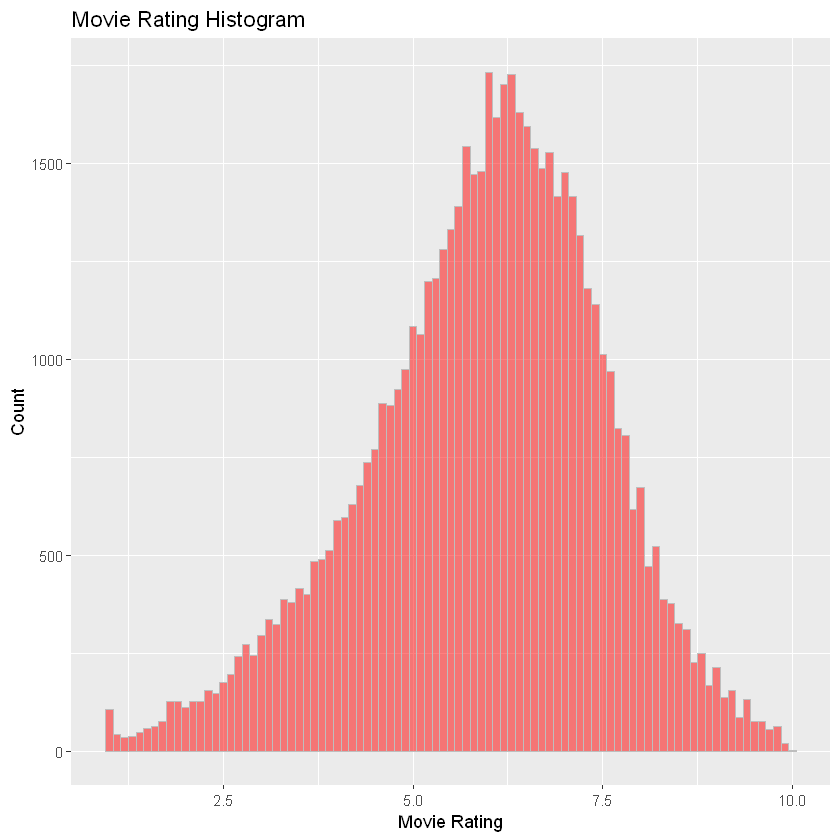

In [16]:
pl <- ggplot(data=movies, aes(x=rating))                                      # Data and Aesthetics Layer
pl <- pl + geom_histogram(binwidth=0.1, color="grey", fill="red", alpha=0.5)  # Geometries layer, alpha sets the trasnparency
pl <- pl + xlab("Movie Rating") + ylab("Count")                               # Coordinates layer
pl <- pl + ggtitle("Movie Rating Histogram")                                  # Title (and subtitle) layer

pl

**Filling the color of the histogram based on a value**
* Don't worry if you don't understand it; is to show what is possible. 
* We add an aesthetic element to the geometry layer.

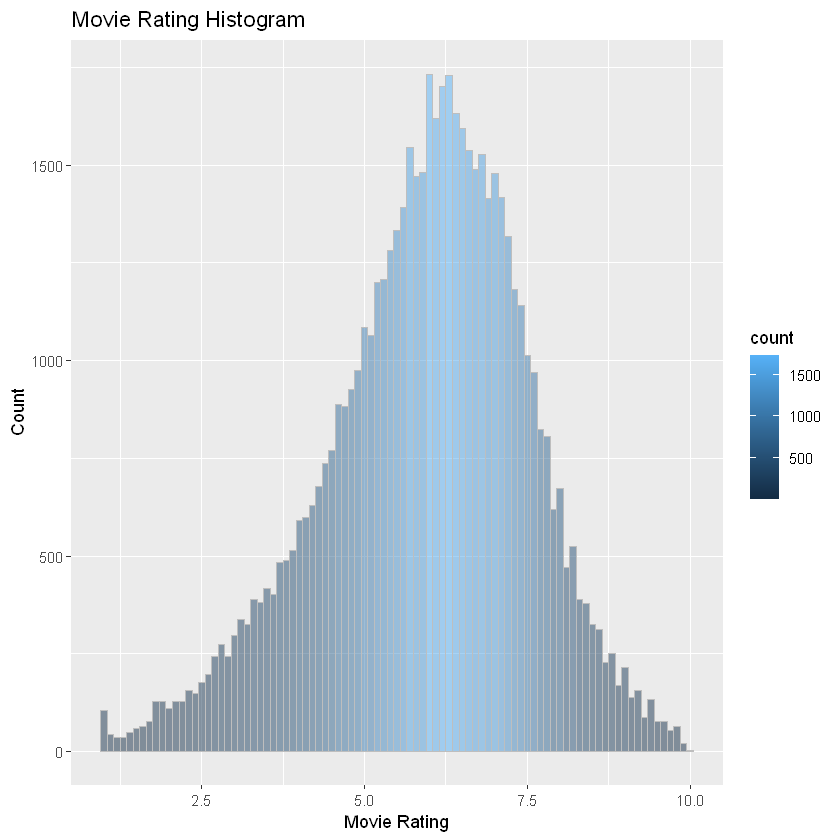

In [27]:
pl <- ggplot(data=movies, aes(x=rating))                                      
pl <- pl + geom_histogram(binwidth=0.1, aes(fill=..count..), color="grey", alpha=0.5)
pl <- pl + xlab("Movie Rating") + ylab("Count")
pl <- pl + ggtitle("Movie Rating Histogram")

pl

### Scatterplots

In [28]:
df <- mtcars

In [30]:
head(x=mtcars, n=5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


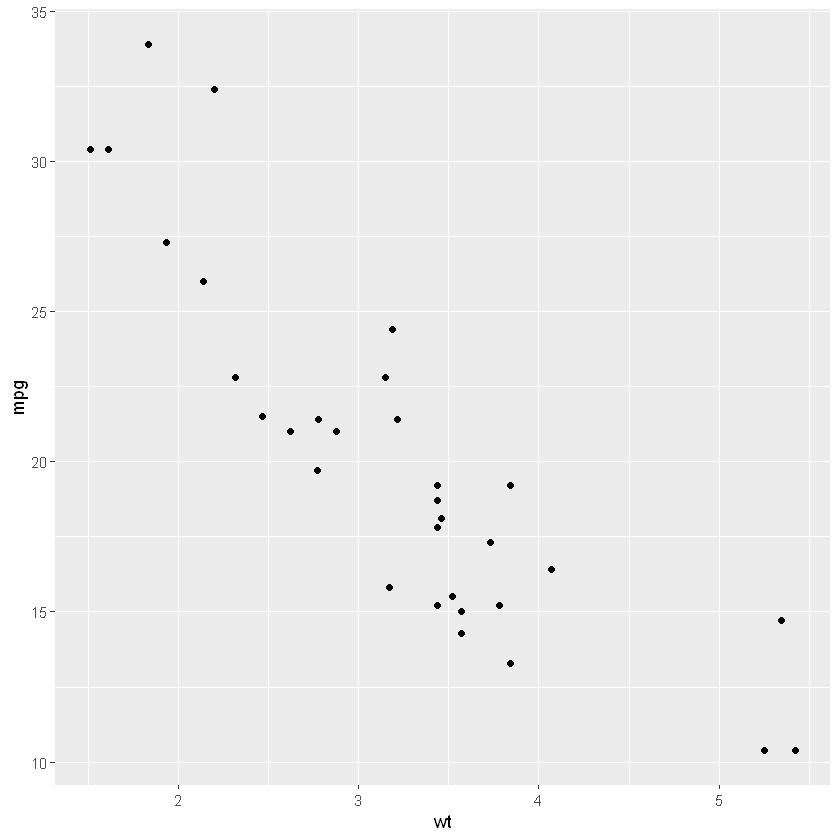

In [32]:
pl2 <- ggplot(data=df, aes(x=wt, y=mpg)) + 
        geom_point()

pl2

* Let's add some more features to the plot

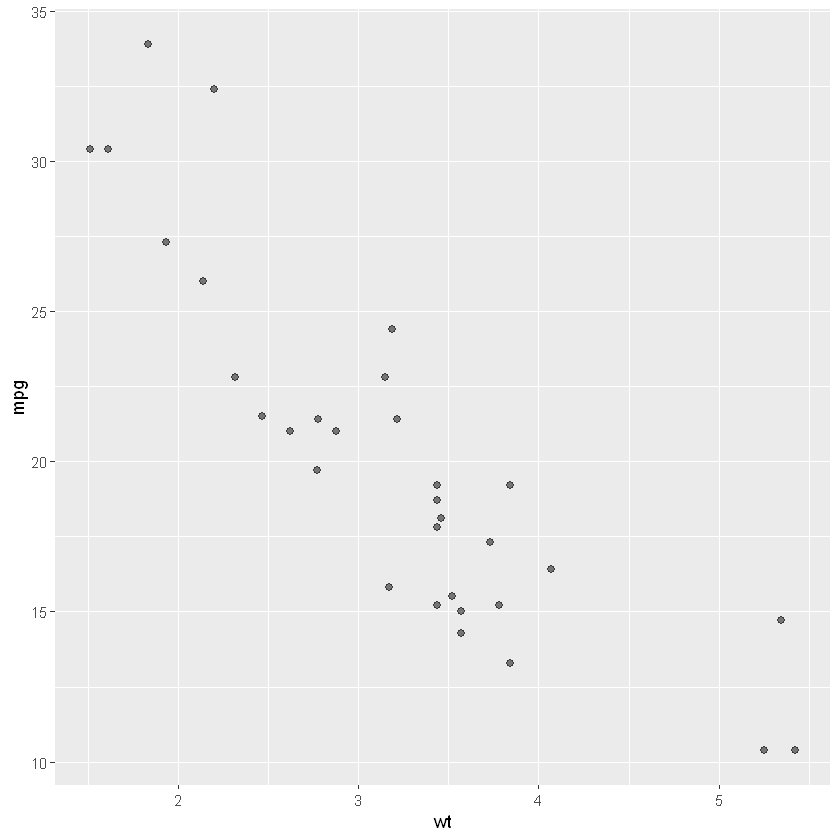

In [35]:
pl2 <- ggplot(data=df, aes(x=wt, y=mpg)) + 
       geom_point(size=2, alpha=0.5)   

pl2

* If I pass **`size`** as as aesthetics inside the geometry layer, we can begin to set the sizes and shapes can be defined by other features in my dataset.
* We can also pass **`color`** in the aesthetics inside the geometry layer.

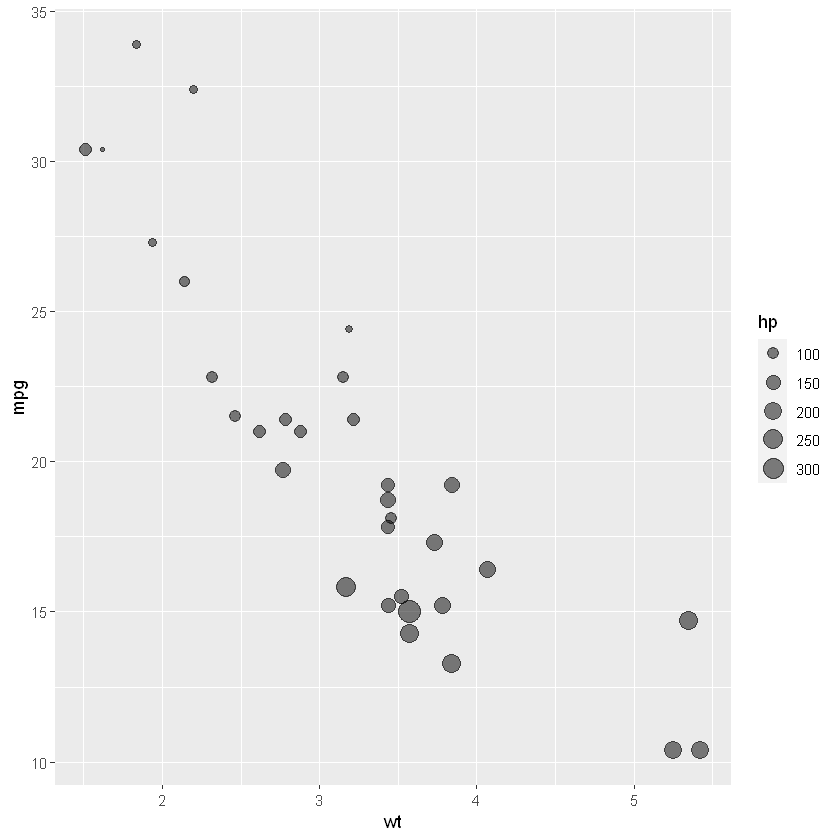

In [39]:
pl2 <- ggplot(data=df, aes(x=wt, y=mpg)) + 
       geom_point(aes(size=hp), alpha=0.5)   

pl2

* When doing the same point sizing on cylinder (`cyl`), because it is a categorical variable, we add `factor()` around it.  
* Otherwise we would be treated as continious and get sizes in the scale that don't exist (like 3 and 5)

Warning message:
"Using size for a discrete variable is not advised."

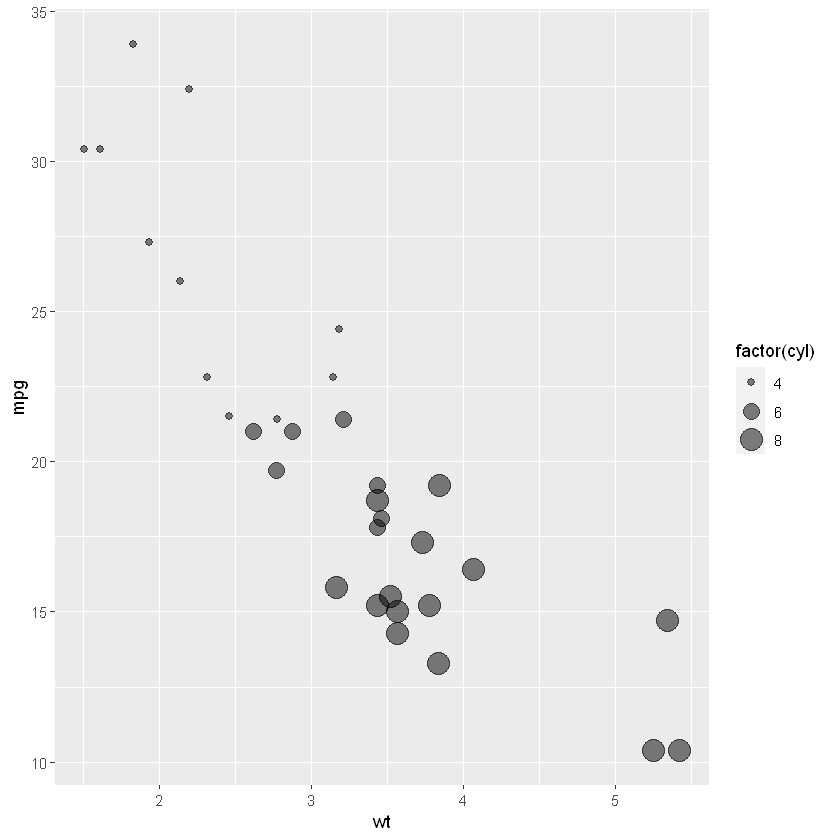

In [43]:
pl2 <- ggplot(data=df, aes(x=wt, y=mpg)) + 
       geom_point(aes(size=factor(cyl)), alpha=0.5)   

pl2

* All that said, we don't change size for a discrete variable.  We tend to change shape (or color)

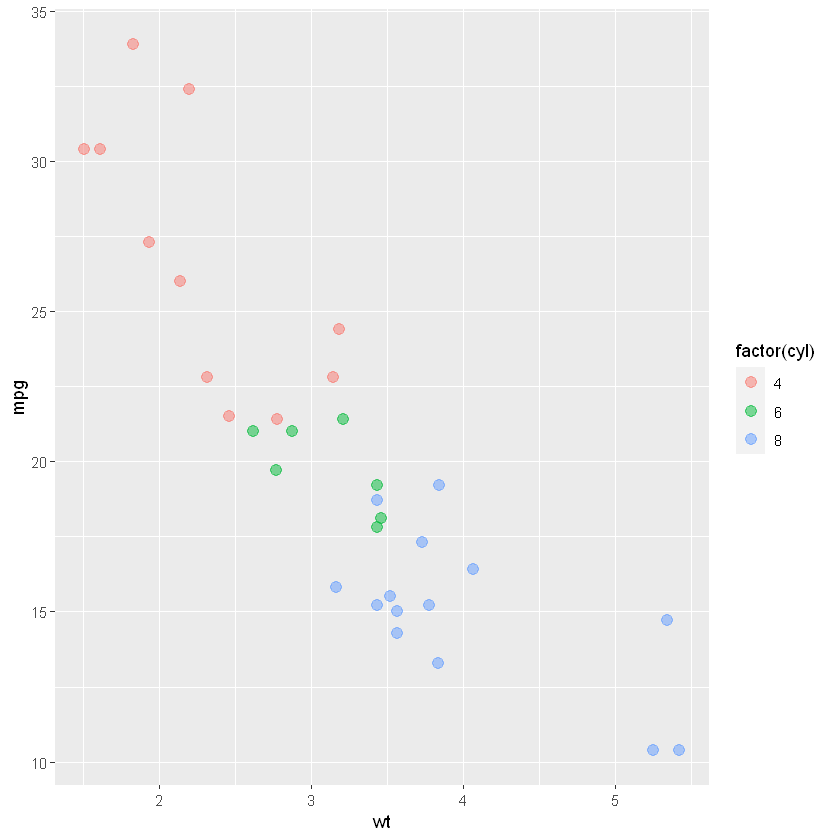

In [46]:
pl2 <- ggplot(data=df, aes(x=wt, y=mpg)) + 
       geom_point(aes(color=factor(cyl)), size=3, alpha=0.5)   

pl2

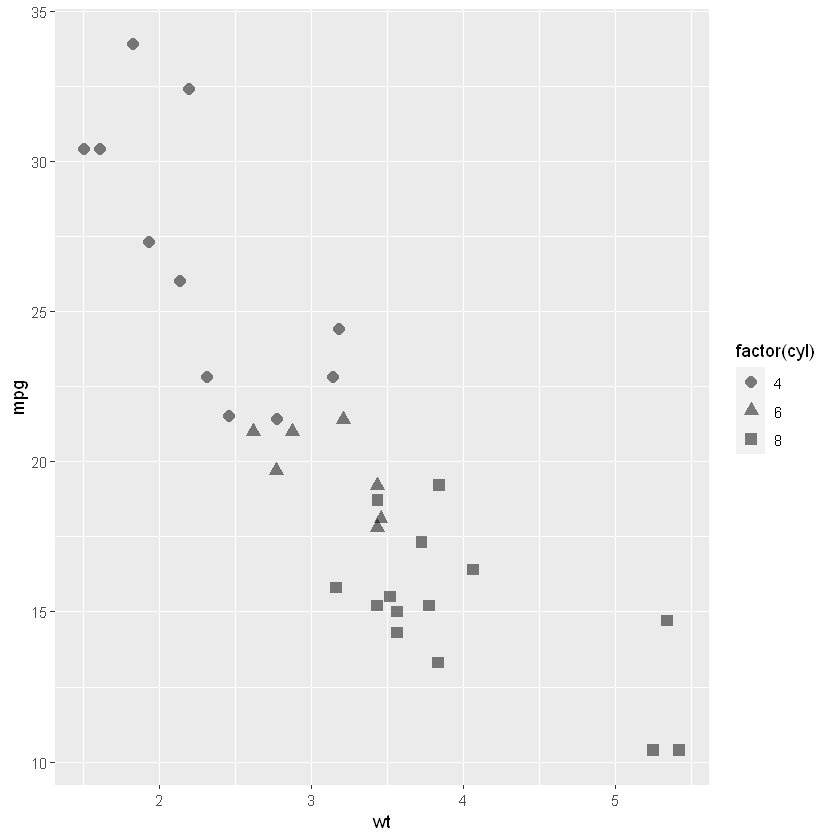

In [47]:
pl2 <- ggplot(data=df, aes(x=wt, y=mpg)) + 
       geom_point(aes(shape=factor(cyl)), size=3, alpha=0.5)   

pl2

* **So if we want things like shape, size, color to be based on data in our data frame, we must pass them inside the `aes()` function inside the geometry layer.**
* Otherwise if we call them by some sort of standard integer value, we pass them by themselves inside the geometry layer. 

* Also we can define both color and shape based on a filed inside the **`aes()`** function.

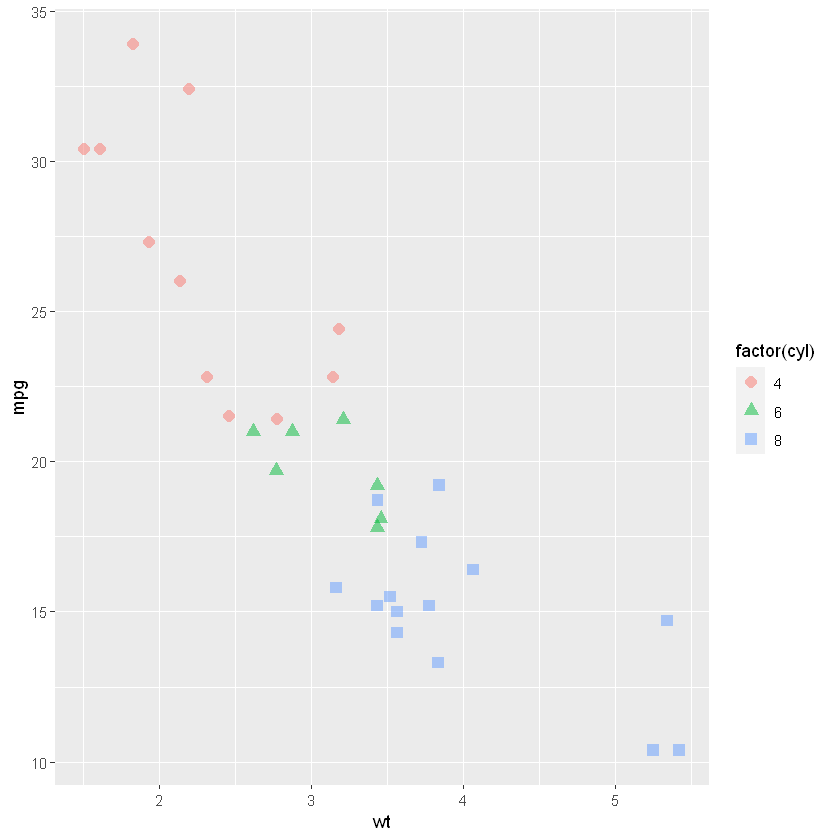

In [48]:
pl2 <- ggplot(data=df, aes(x=wt, y=mpg)) + 
       geom_point(aes(shape=factor(cyl), color=factor(cyl)), size=3, alpha=0.5)   

pl2

* Let's talk a bit more about color in the geometry layer. 
    * We can just say a simple statement like **`color="blue"`**.
    * We can also pass hex color codes, such as **`color="#43e8d8"`** (this is teal).
    * You can get hex color codes for your color **[here](https://www.color-hex.com/)**.

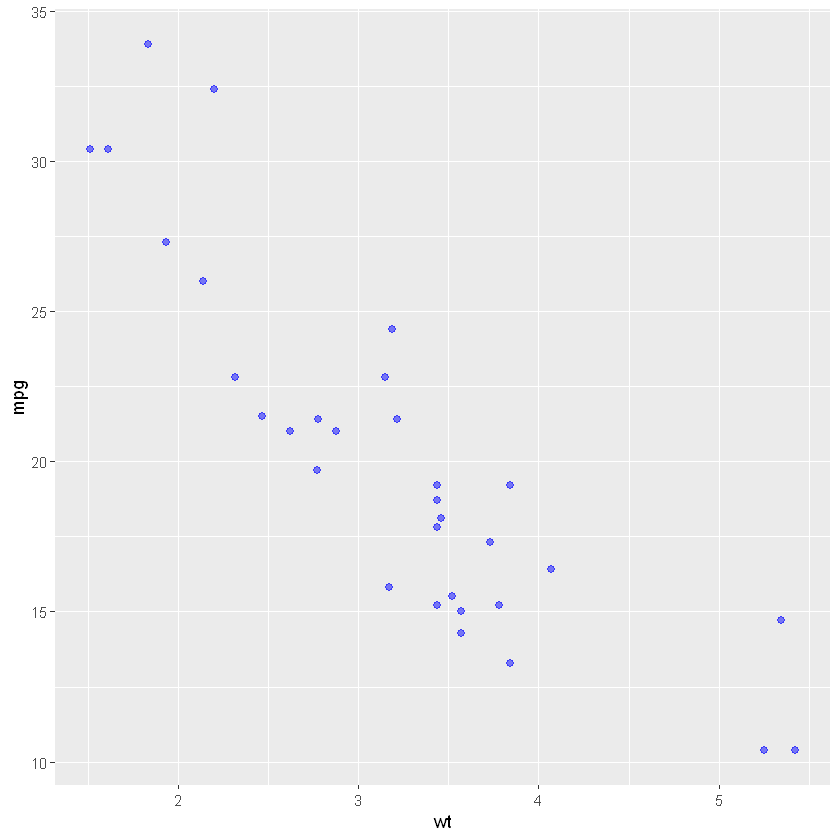

In [49]:
pl2 <- ggplot(data=df, aes(x=wt, y=mpg)) + 
       geom_point(size=2, alpha=0.5, color="blue")   

pl2

* We can also control the scale color gradient  when we pass **`color()`** in the **`aes`**
* The **`scale_color_gradient()`** is outside the **`aes()`**, but it works because we defined **`color()`** inside it.

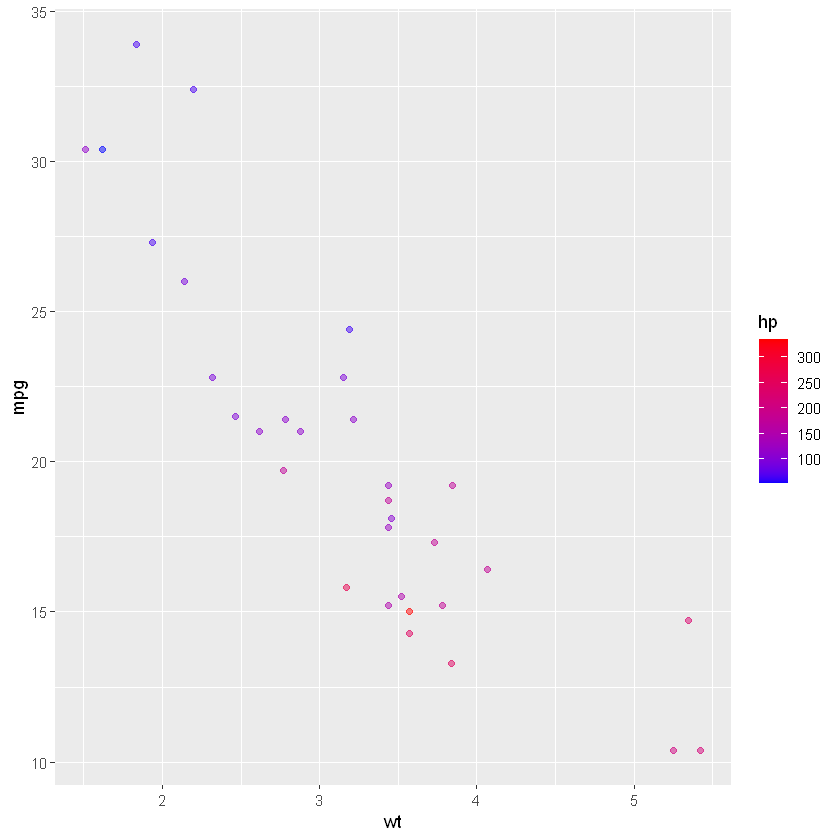

In [52]:
pl2 <- ggplot(data=df, aes(x=wt, y=mpg)) + 
       geom_point(aes(color=hp), alpha=0.5) + 
       scale_color_gradient(low="blue", high="red")

pl2

### Barplots

* Let's make a count bar plot of cars by class

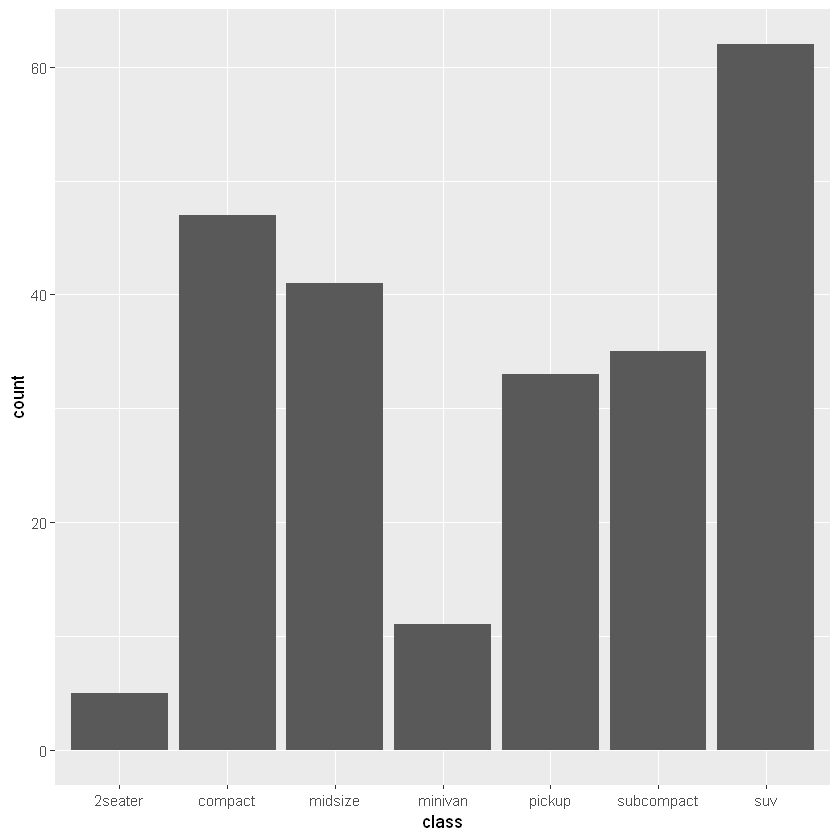

In [56]:
pl3 <- ggplot(data=mpg, aes(x=class)) + 
              geom_bar()
pl3

* We can color the bard based on the drive type (front wheel, back wheel, all wheel)

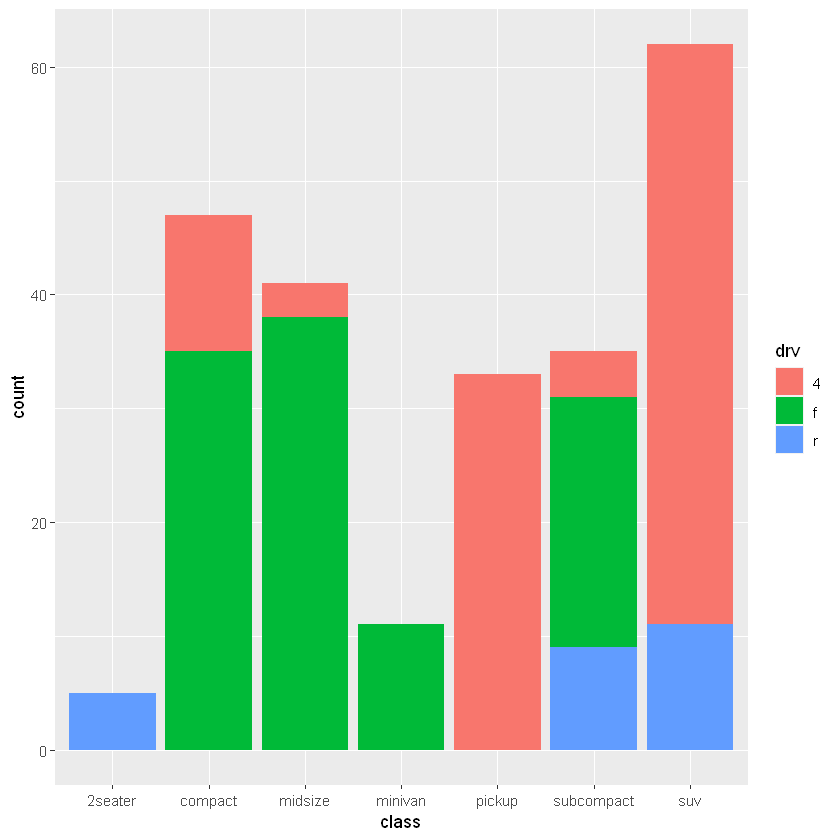

In [59]:
pl3 <- ggplot(data=mpg, aes(x=class)) + 
              geom_bar(aes(fill=drv))

pl3

* By adding **`position="dodge"`** shows the bars side-by-side rather than stacked.

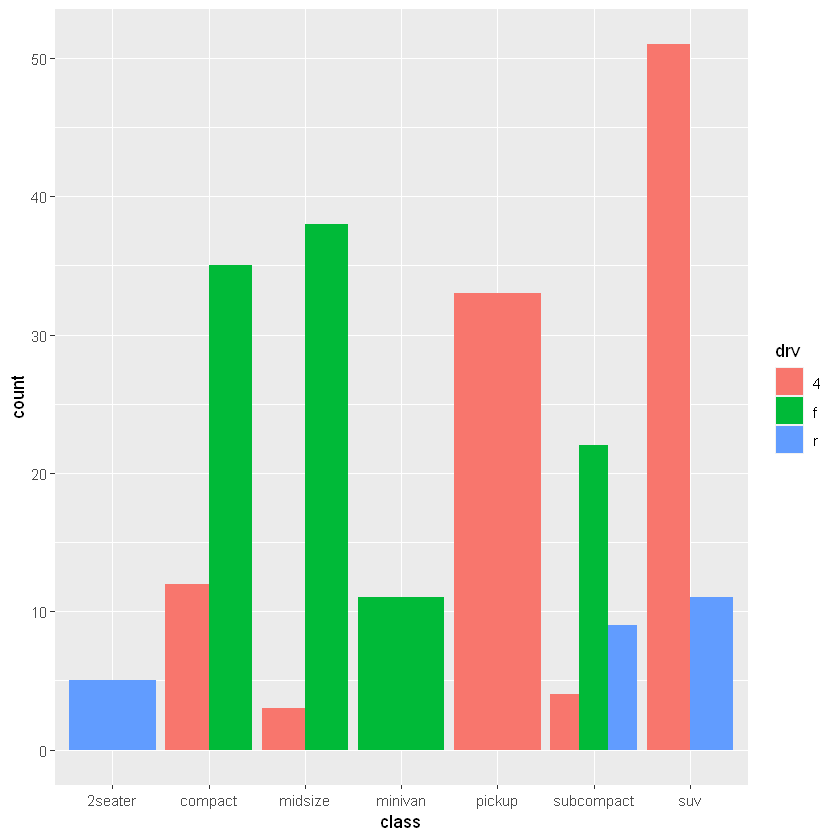

In [60]:
pl3 <- ggplot(data=mpg, aes(x=class)) + 
              geom_bar(aes(fill=drv), position="dodge")

pl3

* With **`position="fill"`** shows us the percentage of of drive type for each car type.

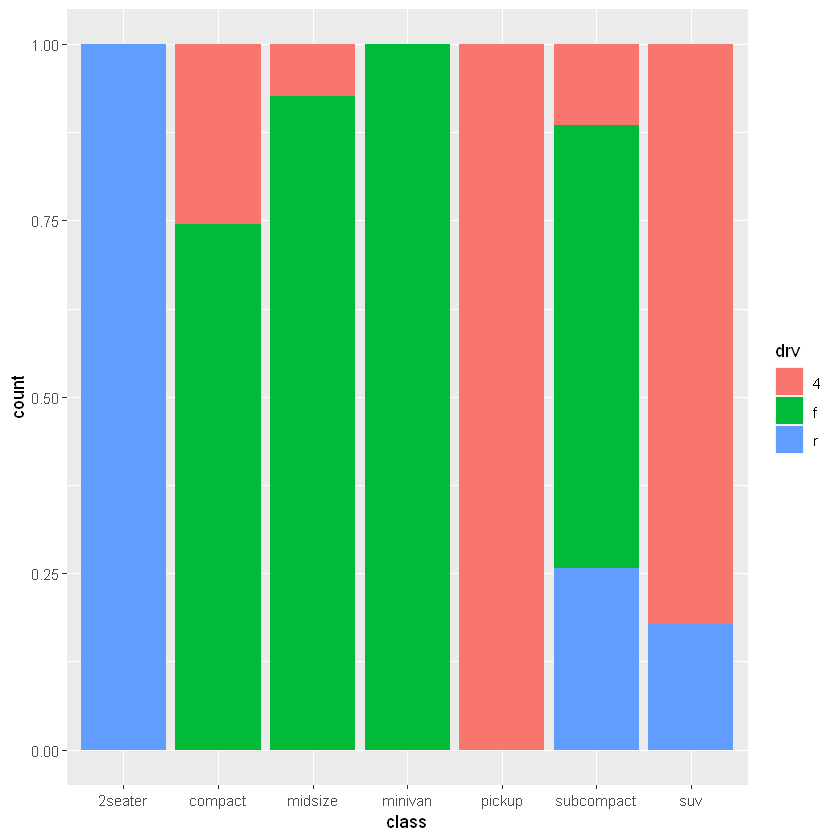

In [61]:
pl3 <- ggplot(data=mpg, aes(x=class)) + 
              geom_bar(aes(fill=drv), position="fill")

pl3

### Box Plots

* **Note that the x axis of a box plot must be categorical, so we need to put `x=factor(column)`**

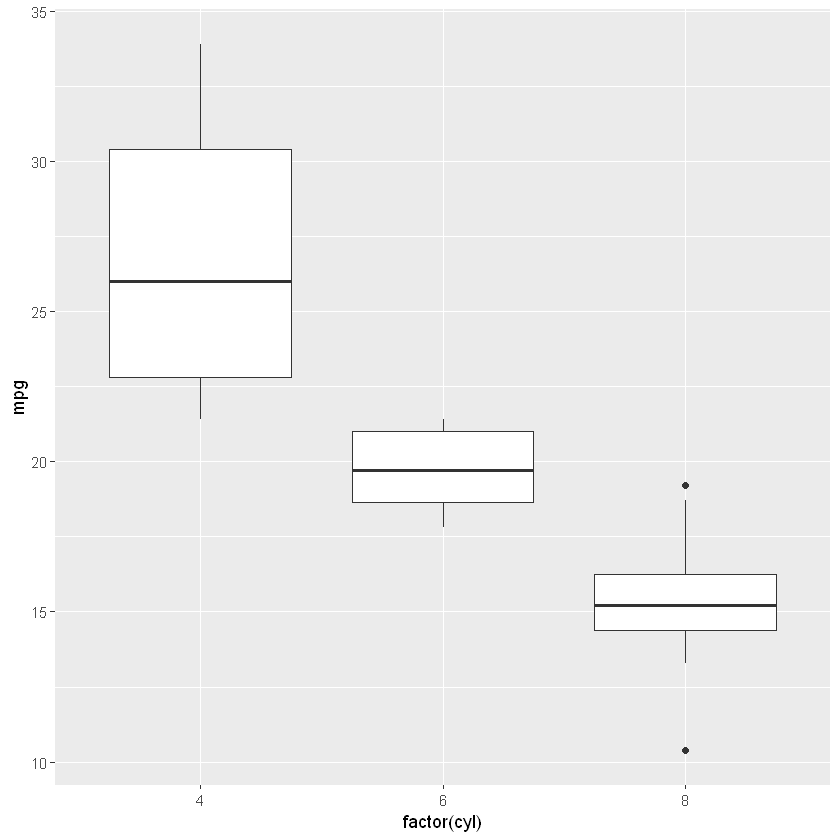

In [68]:
pl4 <- ggplot(data=df, aes(x=factor(cyl), y=mpg)) + 
        geom_boxplot()

pl4

* **`coord_flip`** makes the box plots horizontal

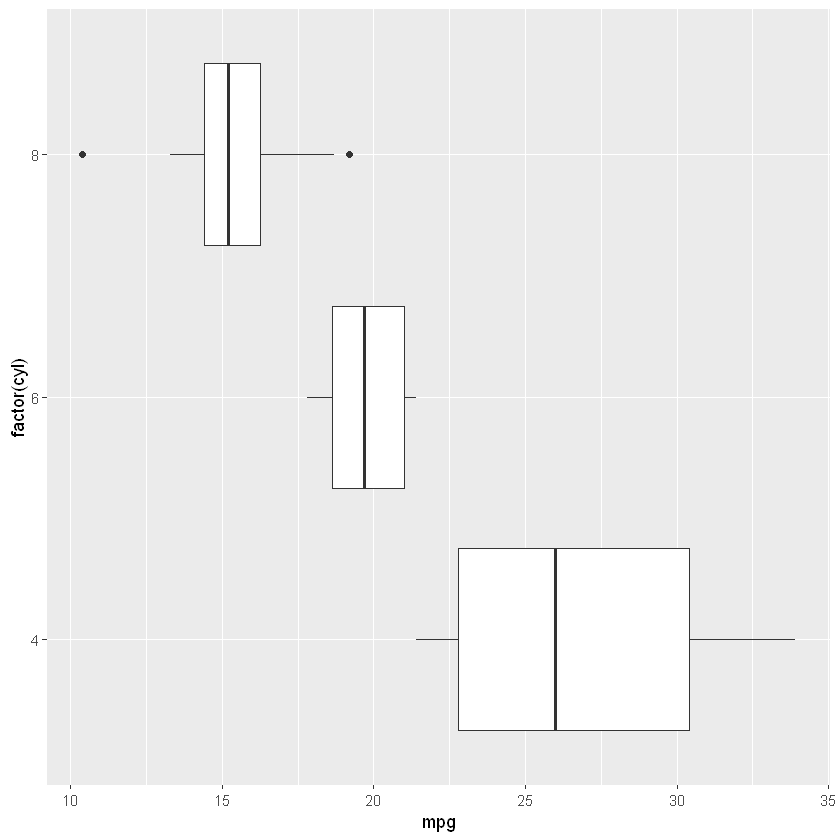

In [76]:
pl4 <- ggplot(data=df, aes(x=factor(cyl), y=mpg)) + 
        geom_boxplot() + 
        coord_flip()

pl4

* We also color the box plot fills and lines

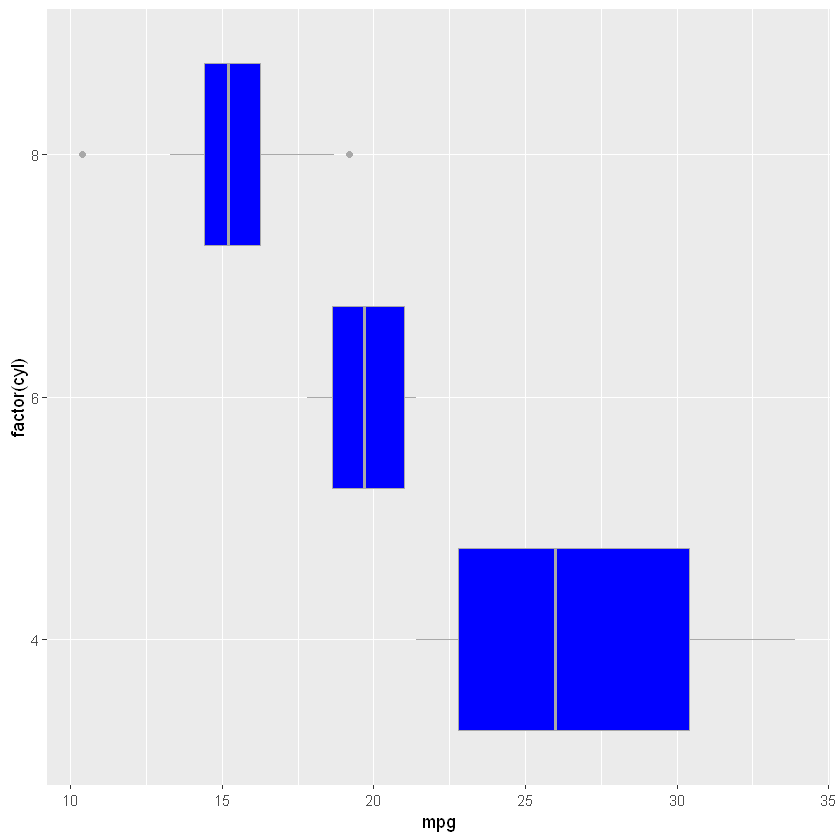

In [78]:
pl4 <- ggplot(data=df, aes(x=factor(cyl), y=mpg)) + 
        geom_boxplot(fill="blue", color="darkgrey") + 
        coord_flip()

pl4

* We color the box plot based on categorical variable cylinder

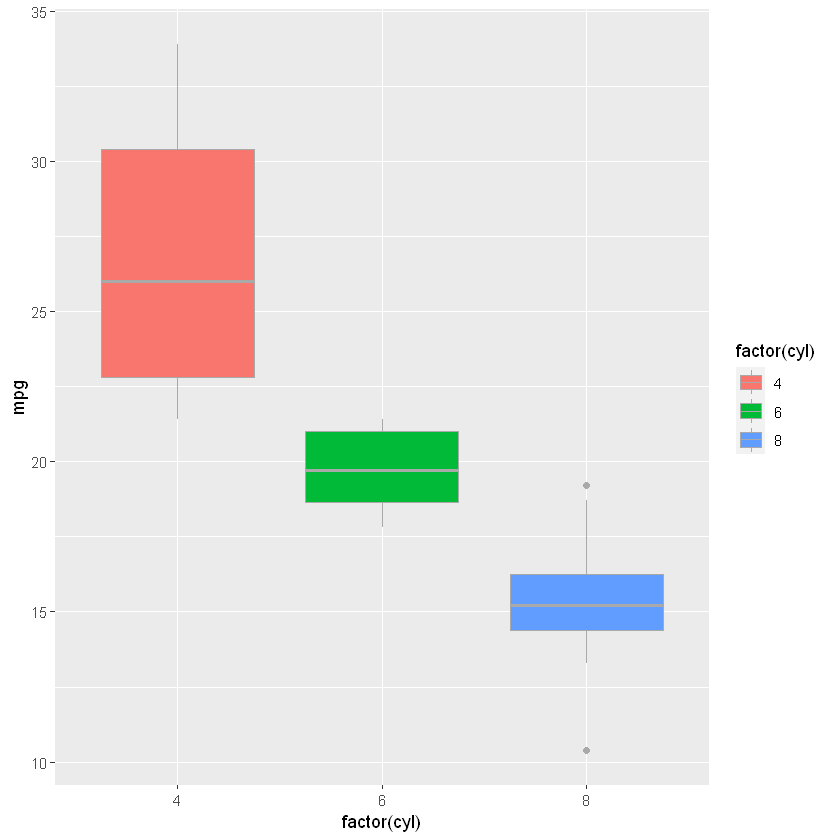

In [81]:
pl4 <- ggplot(data=df, aes(x=factor(cyl), y=mpg)) + 
        geom_boxplot(aes(fill=factor(cyl)), color="darkgrey")

pl4

* We can also apply a **`theme`** to the graph
* If you type **`theme_`** and press tab, you can get a list of all available themes. 

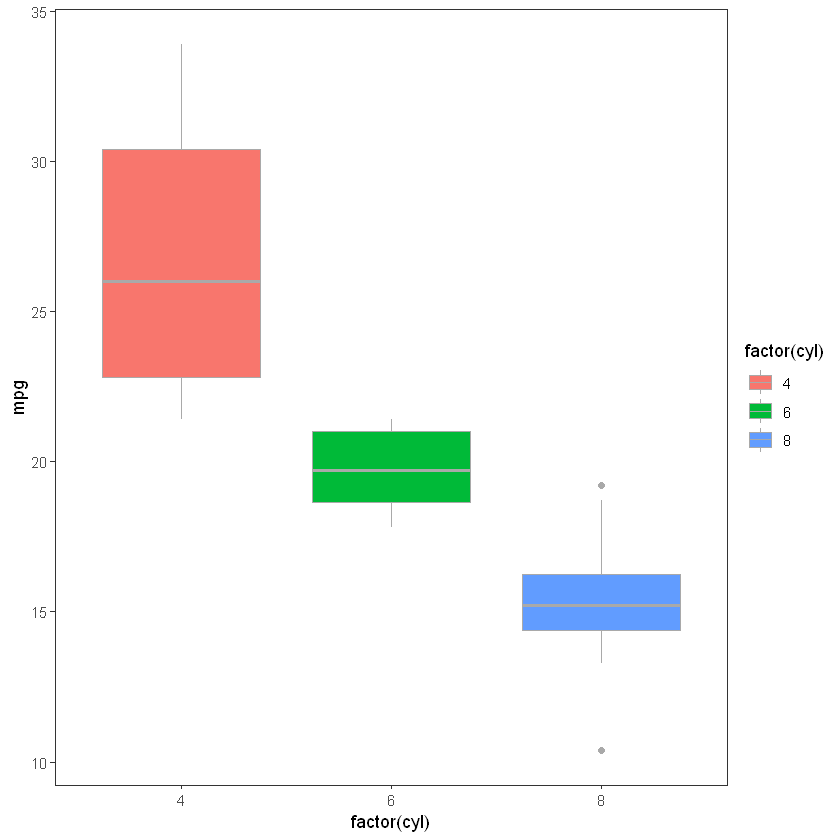

In [84]:
pl4 <- ggplot(data=df, aes(x=factor(cyl), y=mpg)) + 
        geom_boxplot(aes(fill=factor(cyl)), color="darkgrey") + 
        theme_test()

pl4

### Two-variable Plotting

In [85]:
head(movies)

title,year,length,budget,rating,votes,r1,r2,r3,r4,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
$,1971,121,NA,6.4,348,4.5,4.5,4.5,4.5,...,4.5,4.5,,0,0,1,1,0,0,0
$1000 a Touchdown,1939,71,NA,6.0,20,0.0,14.5,4.5,24.5,...,4.5,14.5,,0,0,1,0,0,0,0
$21 a Day Once a Month,1941,7,NA,8.2,5,0.0,0.0,0.0,0.0,...,24.5,24.5,,0,1,0,0,0,0,1
"$40,000",1996,70,NA,8.2,6,14.5,0.0,0.0,0.0,...,34.5,45.5,,0,0,1,0,0,0,0
"$50,000 Climax Show, The",1975,71,NA,3.4,17,24.5,4.5,0.0,14.5,...,0.0,24.5,,0,0,0,0,0,0,0
$pent,2000,91,NA,4.3,45,4.5,4.5,4.5,14.5,...,14.5,14.5,,0,0,0,1,0,0,0


* First let's have a look at the **`geom_bin2d()`** geometry.
* This shows us sort of a heat map of the count of ratings by rate and year.

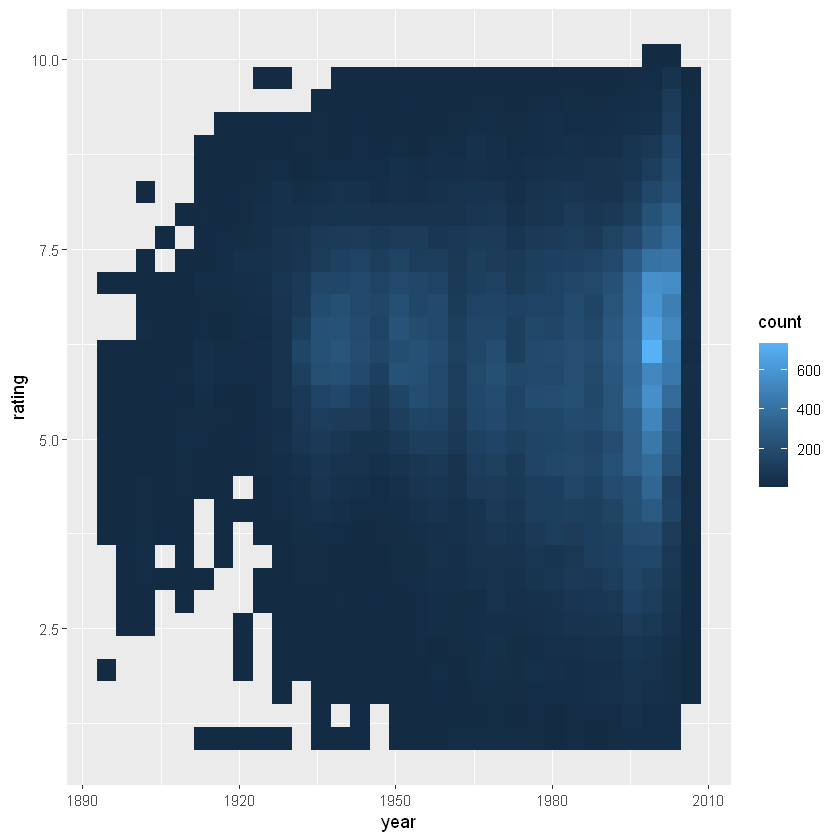

In [89]:
pl4 <- ggplot(data=movies, aes(x=year, y=rating)) + 
        geom_bin2d()

pl4

* We can also add a color gradient to the 2d "heat map"

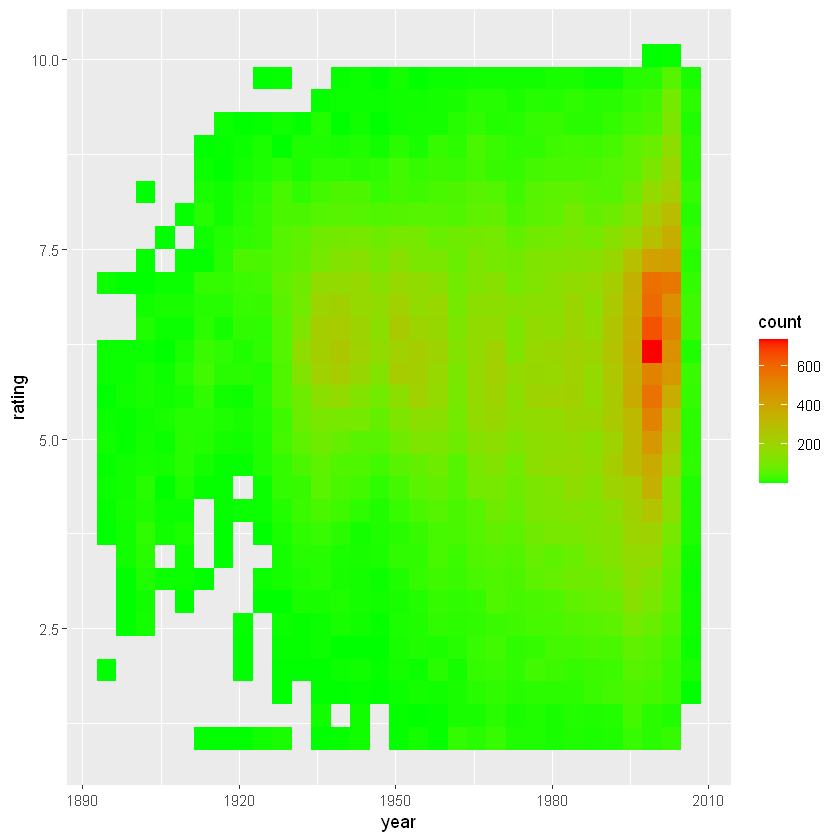

In [91]:
pl4 <- ggplot(data=movies, aes(x=year, y=rating)) + 
        geom_bin2d() + 
        scale_fill_gradient(high="red", low="green")

pl4

* We can also pass the bin width, which is 2d parameter as we are working with two variables.

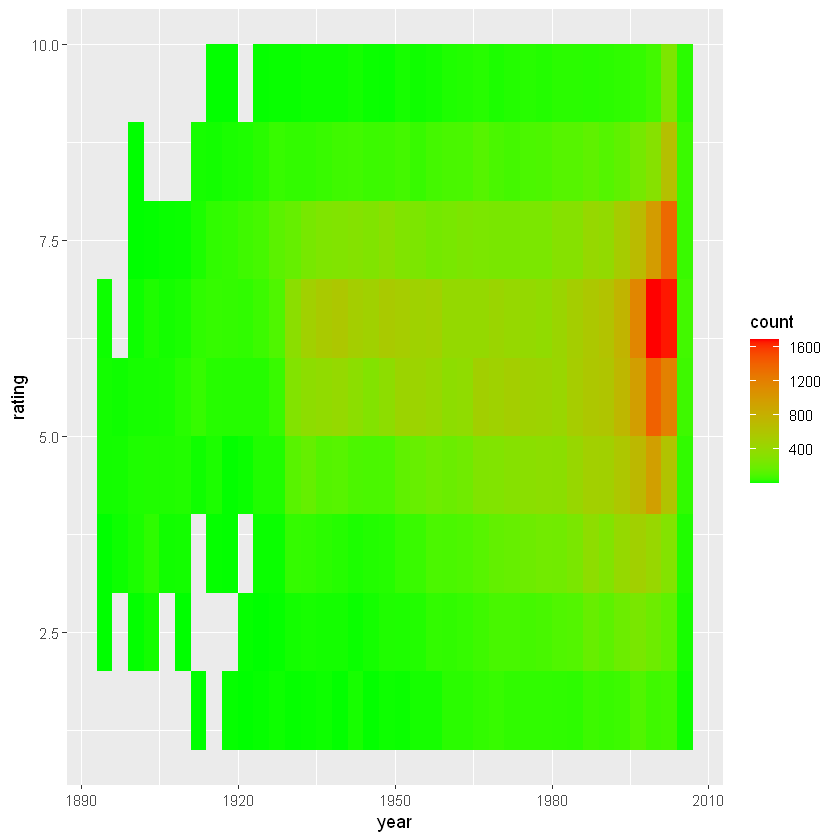

In [94]:
pl4 <- ggplot(data=movies, aes(x=year, y=rating)) + 
        geom_bin2d(binwidth=c(3,1)) + 
        scale_fill_gradient(high="red", low="green")

pl4

* We can also do a similar plot which is hexagons instead of squares

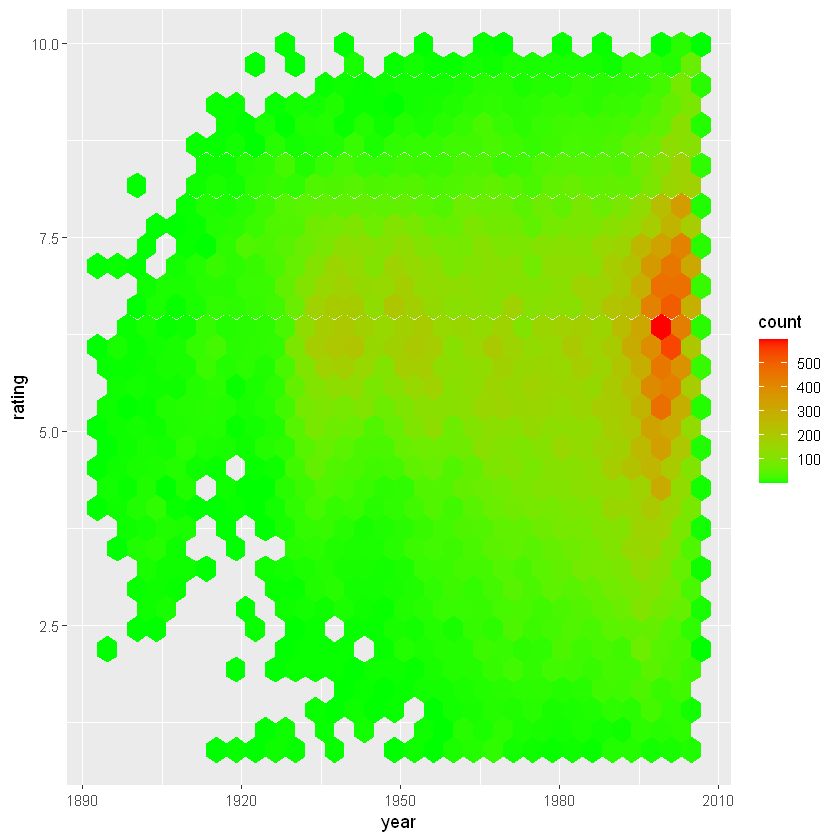

In [98]:
pl4 <- ggplot(data=movies, aes(x=year, y=rating)) + 
        geom_hex() +
        scale_fill_gradient(high="red", low="green")

pl4

* Also we can do a density plot

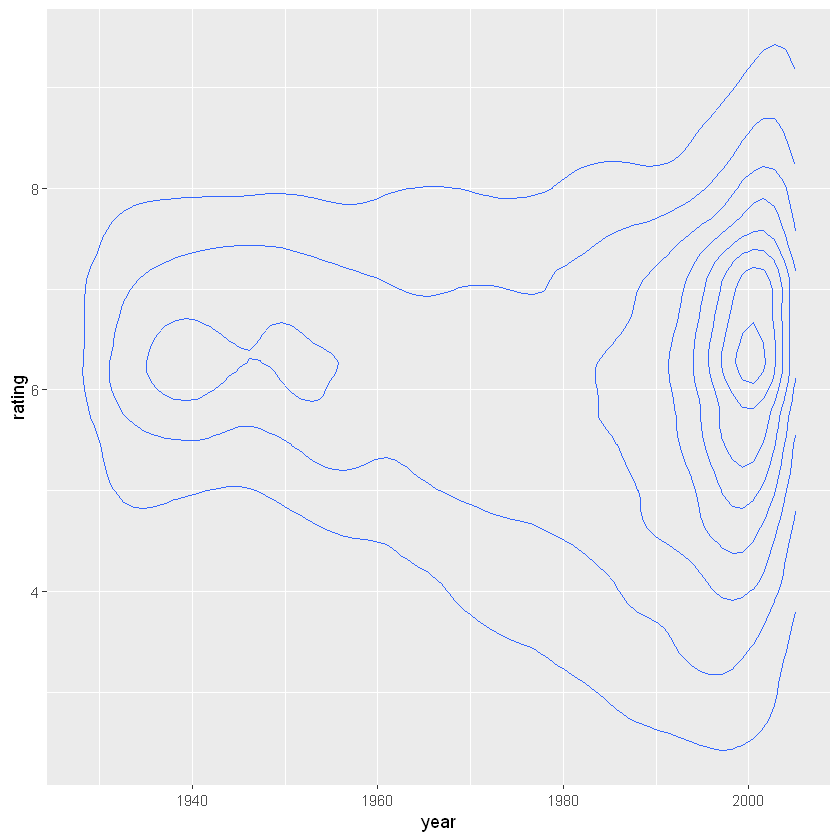

In [104]:
pl4 <- ggplot(data=movies, aes(x=year, y=rating)) + 
        geom_density_2d()

pl4

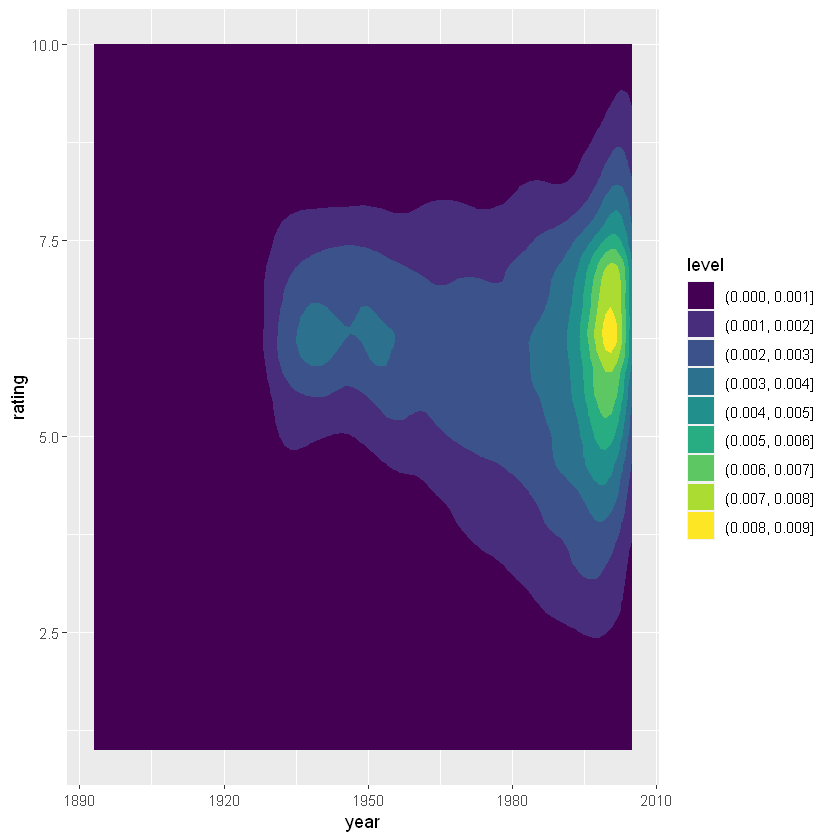

In [103]:
pl4 <- ggplot(data=movies, aes(x=year, y=rating)) + 
        geom_density_2d_filled()

pl4

## Coordinates

* Coordinates allows us to resize our plots correctly. 
* Faceting allows us to place several plots next to eachother.

In [105]:
head(x=mpg, n=3)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


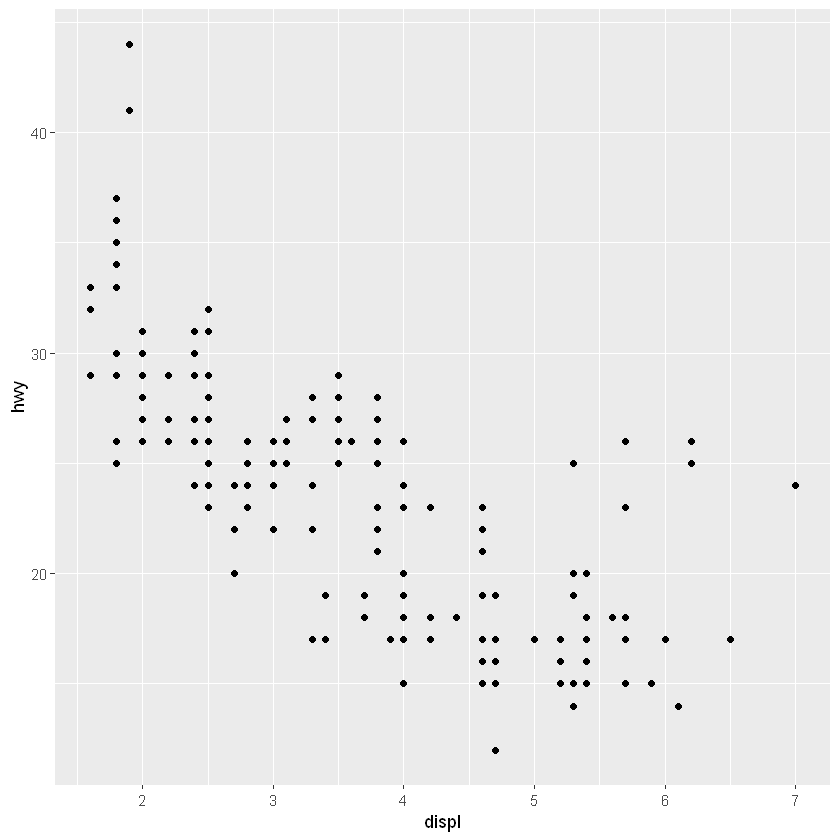

In [9]:
pl5 <- ggplot(data=mpg, aes(x=displ, y=hwy)) + 
        geom_point()
pl5

* With **`coord_cartesian()`** we can set limits on the x and y axes.

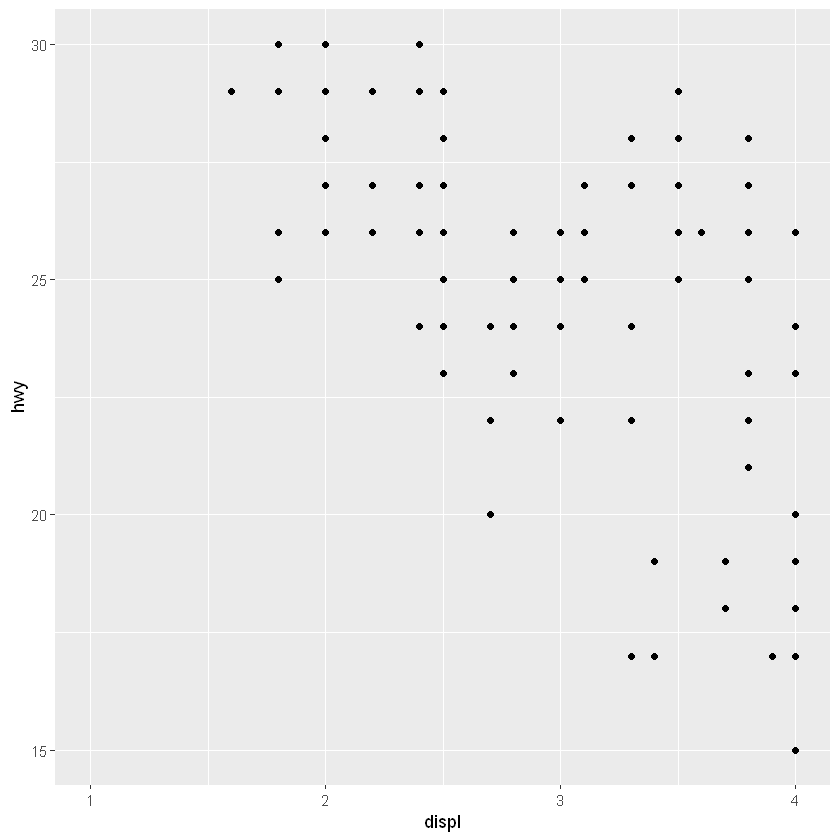

In [115]:
pl5 <- ggplot(data=mpg, aes(x=displ, y=hwy)) + 
        geom_point() +   
        coord_cartesian(xlim=c(1,4), ylim=c(15,30))

pl5

* We can also control the graphs aspect ratio with **`coord_fixed()`**

In [121]:
pl5 <- ggplot(data=mpg, aes(x=displ, y=hwy)) + 
        geom_point() +   
        coord_fixed(ratio=1/5, xlim=c(1,4), ylim=c(15,30))

pl5

ERROR: Error in coord_cartesian(ratio = 1/5, xlim = c(1, 4), ylim = c(15, 30)): unused argument (ratio = 1/5)


## Faceting

* The general faceting syntax is **`facet_grid(y_faceting ~ x_faceting)`**
* If there is not x or y faceting, you enter period **`.`**

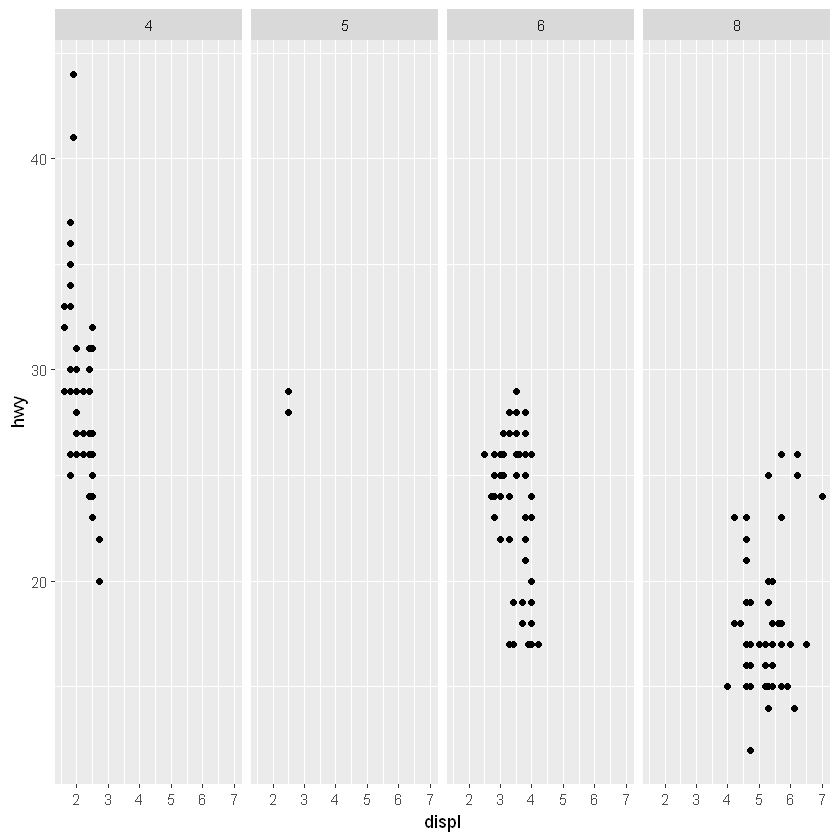

In [ ]:
pl5 <- ggplot(data=mpg, aes(x=displ, y=hwy)) + 
        geom_point() +   
        # coord_fixed(ratio=1/4) + 
        facet_grid(. ~ cyl)

pl5

* Two dimensional facets

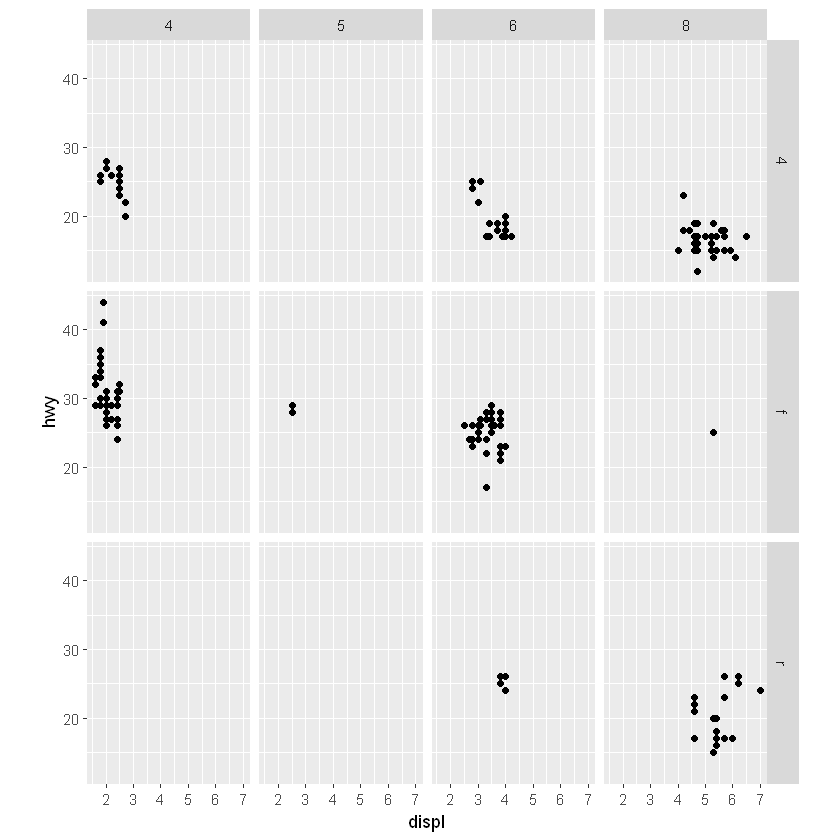

In [129]:
pl5 <- ggplot(data=mpg, aes(x=displ, y=hwy)) + 
        geom_point() +   
        coord_fixed(ratio=1/4) + 
        facet_grid(drv ~ cyl)

pl5

### Themes

* Themes allow us to quickly and easily create beautiful data vosualizations. 
* There are a lot of themes buil-in ggplot, but we will also install library **`ggthemes`** which adds more build-in themes for ggplot.

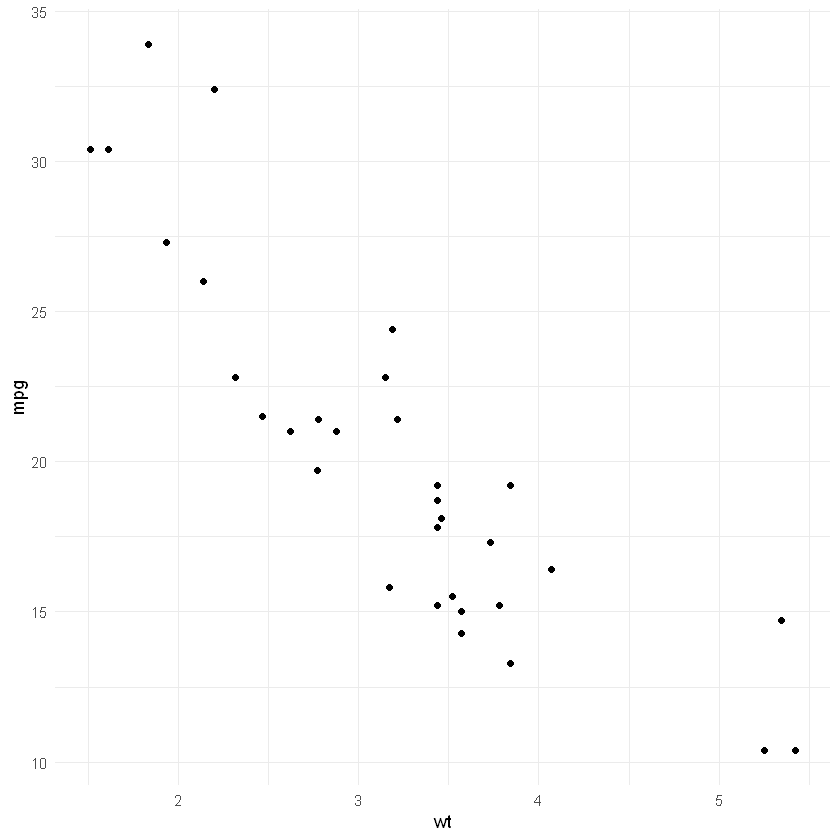

In [133]:
theme_set(theme_minimal()) # This adds the same theme for all your plots

pl6 <- ggplot(data=mtcars, aes(x=wt, y=mpg)) + 
        geom_point()

pl6

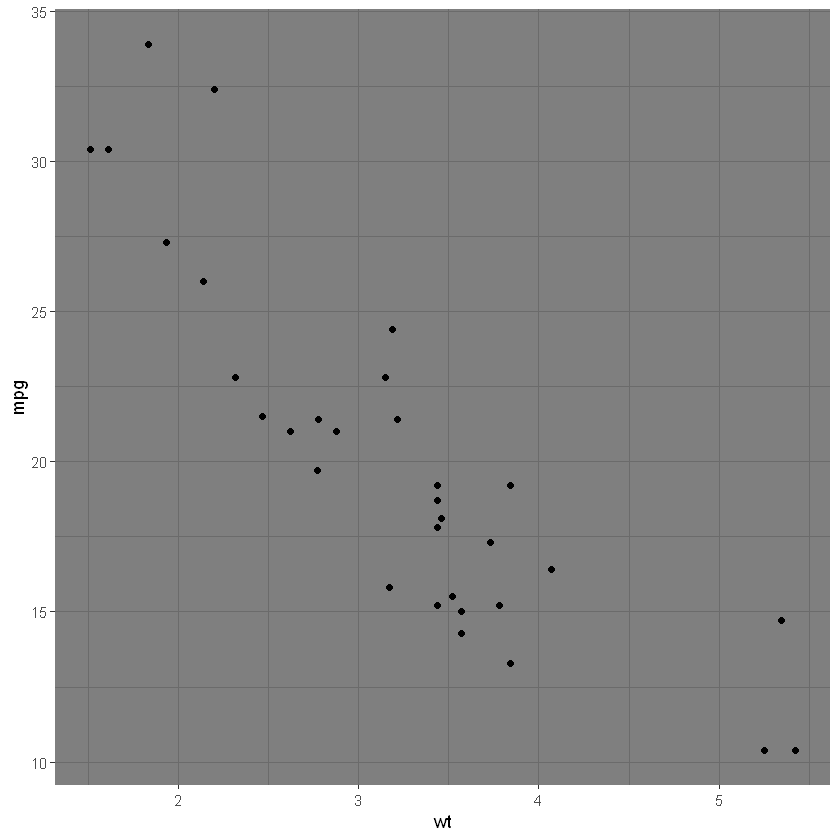

In [135]:
pl6 <- ggplot(data=mtcars, aes(x=wt, y=mpg)) + 
        geom_point() + 
        theme_dark()  # Sets the theme just for the specific plot

pl6

In [136]:
install.packages("ggthemes")

package 'ggthemes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\foufo\AppData\Local\Temp\RtmpY9sSdM\downloaded_packages


In [138]:
library(ggthemes)

* Now you will notice you will have a lot more themes available to you. 
* Many of them are based on real publication, and it emulates their style.